#Muhammad Luthfan Lazuardi - 24060122120010

*   Nama : Muhammad Luthfan Lazuardi
*   NIM : 24060122120010
*   Lab : C1
*   Tanggal : 26 November 2024

#I. Melakukan Clustering Menggunakan Dataset Iris

#A. Import Dataset

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Penjelasan :


---

Di atas berfungsi mengimpor pustaka untuk analisis data dan visualisasi. %matplotlib inline membuat grafik tampil langsung. deepcopy digunakan untuk membuat salinan data yang terpisah, sementara numpy dan pandas digunakan untuk manipulasi data. Untuk membuat grafik, digunakan pyplot dari matplotlib. Ukuran grafik disetting menjadi 16x9 inci, dan gaya tampilannya menggunakan tema ggplot.

---

In [2]:
# Import dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)


fitur = data[['petal-length', 'petal-width']]

print(fitur.shape)
print(fitur.head(20))

(150, 2)
    petal-length  petal-width
0            1.4          0.2
1            1.4          0.2
2            1.3          0.2
3            1.5          0.2
4            1.4          0.2
5            1.7          0.4
6            1.4          0.3
7            1.5          0.2
8            1.4          0.2
9            1.5          0.1
10           1.5          0.2
11           1.6          0.2
12           1.4          0.1
13           1.1          0.1
14           1.2          0.2
15           1.5          0.4
16           1.3          0.4
17           1.4          0.3
18           1.7          0.3
19           1.5          0.3


Penjelasan :

---

Di atas untuk mengimpor dataset Iris dari URL lalu memberikan nama untuk kolom-kolomnya. Kemudian, dua fitur yang dipilih, yaitu petal-length dan petal-width disimpan dalam variabel fitur. Selanjutnya, menampilkan ukuran dataset dengan fitur.shape yang menunjukkan jumlah baris dan kolom, serta menampilkan 20 baris pertama dari data menggunakan fitur.head(20) untuk memberikan gambaran awal tentang data yang dipilih.

---


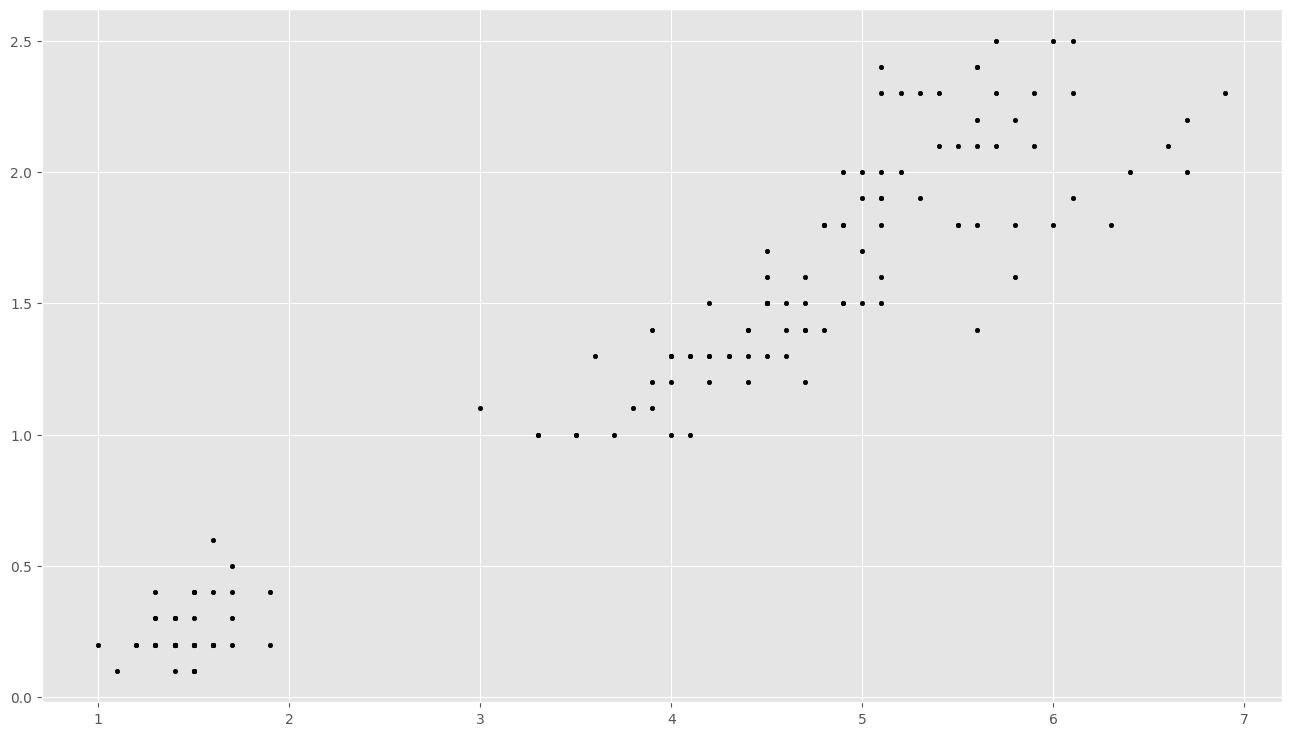

In [3]:
# Plot dataset
f1 = data['petal-length'].values
f2 = data['petal-width'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

Penjelasan :

---

Kode di atas digunakan untuk membuat visualisasi grafik scatter plot dari dua fitur dalam dataset Iris. Pertama, kolom petal-length dan petal-width diambil dari dataset dan disimpan dalam variabel f1 dan f2. Selanjutnya, kedua fitur tersebut digabungkan menjadi 1 array 2D menggunakan np.array(list(zip(f1, f2))), yang disimpan dalam variabel X. Setelah itu, plt.scatter() digunakan untuk membuat scatter plot, dengan f1 sebagai sumbu X dan f2 sebagai sumbu Y. Titik-titik dalam plot diberi warna hitam (c='black') dan ukuran titik ditentukan sebesar 10 (s=10).

---


#B. Melakukan clustering

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

C = kmeans.cluster_centers_
print(C)

[[5.62608696 2.04782609]
 [1.464      0.244     ]
 [4.29259259 1.35925926]]


Penjelasan:


---
Kode di atas menggunakan algoritma KMeans untuk melakukan klustering. Pertama, KMeans(n_clusters=3) digunakan untuk menentukan bahwa data akan dikelompokkan ke dalam 3 kluster. Kemudian, metode fit() digunakan untuk melatih model KMeans dengan data input X. Setelah model dilatih, predict() digunakan untuk mendapatkan label kluster untuk setiap titik data. Selanjutnya, nilai centroid (pusat) untuk setiap kluster diperoleh menggunakan cluster_centers_, yang merupakan titik tengah dari kluster. Selanjutnya dicetak nilai centroid untuk ketiga kluster, dengan setiap nilai mewakili koordinat rata-rata untuk sepal-width dan petal-length di masing-masing kluster.

---





#C. Plot Hasil Clustering

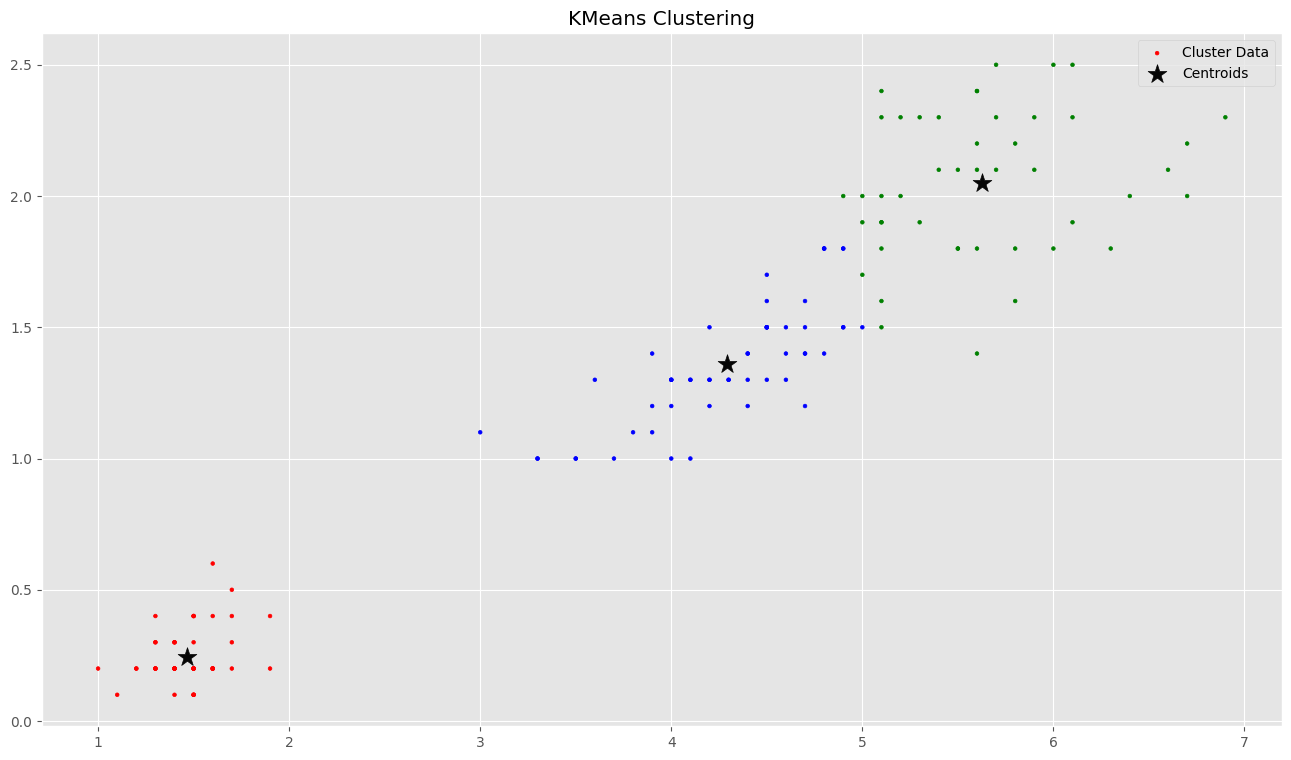

In [7]:
colors =['green', 'red', 'blue']
#plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=7, c=[colors[label] for label in labels], label="Cluster Data")
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505', label="Centroids")

plt.title("KMeans Clustering")
plt.legend()
plt.show()

Penjelasan:

---
Kode di atas untuk memvisualisasikan hasil klustering KMeans dengan menampilkan data yang dikelompokkan dalam 3 warna berbeda dan centroid yang digambarkan sebagai bintang berwarna  hitam. Grafik saya lengkapi dengan legenda untuk membedakan data kluster dan centroid, kemudian ditampilkan menggunakan plt.show().

---





#II. Evaluasi Hasil Clustering dengan Inertia (SSE) dan Silhouette Coefficient

#A. Import Library

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Penjelasan:


---

Kode ini mengimpor pustaka untuk manipulasi data dan visualisasi.

---



#B. Mencari Jumlah Kluster Optimal dengan SSE

In [89]:
for k in range(1, 10) :
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  labels = kmeans.predict(X)
  inertia = kmeans.inertia_
  print("k:", k, "inertia:", inertia)

k: 1 inertia: 550.6434666666671
k: 2 inertia: 86.40394533570999
k: 3 inertia: 31.42928566827697
k: 4 inertia: 19.499400899685114
k: 5 inertia: 14.1874858555542
k: 6 inertia: 11.056639971910453
k: 7 inertia: 9.571463314981171
k: 8 inertia: 8.228066666666665
k: 9 inertia: 6.951364494569753


Penjelasan:


---

Kode di atas digunakan untuk menentukan jumlah kluster yang optimal dalam algoritma KMeans dengan cara menghitung nilai inertia untuk berbagai jumlah kluster (dari 1 hingga 9). Inertia adalah ukuran seberapa baik kluster-kluster yang terbentuk, semakin kecil nilai inertia, semakin baik klusternya. Dalam setiap iterasi, KMeans dijalankan dengan jumlah kluster yang berbeda, kemudian model tersebut dilatih dengan data X dan hasilnya diprediksi dengan predict(). Nilai inertia untuk setiap jumlah kluster dicetak, yang nantinya bisa digunakan untuk melihat berapa kluster yang memberikan hasil terbaik atau stabil.

---



#C. Menentukan Kualitas CLustering dengan Silhoutte Coefficient

In [131]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels)

0.5672668615248836

Penjelasan:


---

Kode di atas menghitung Silhouette Coefficient untuk mengukur seberapa baik klustering yang dilakukan oleh KMeans. Nilai yang lebih tinggi menunjukkan kluster yang lebih baik, dengan data yang lebih terpisah antar kluster.

---

#D. Visualisasi Silhouette Score untuk Menentukan Jumlah Kluster Optimal

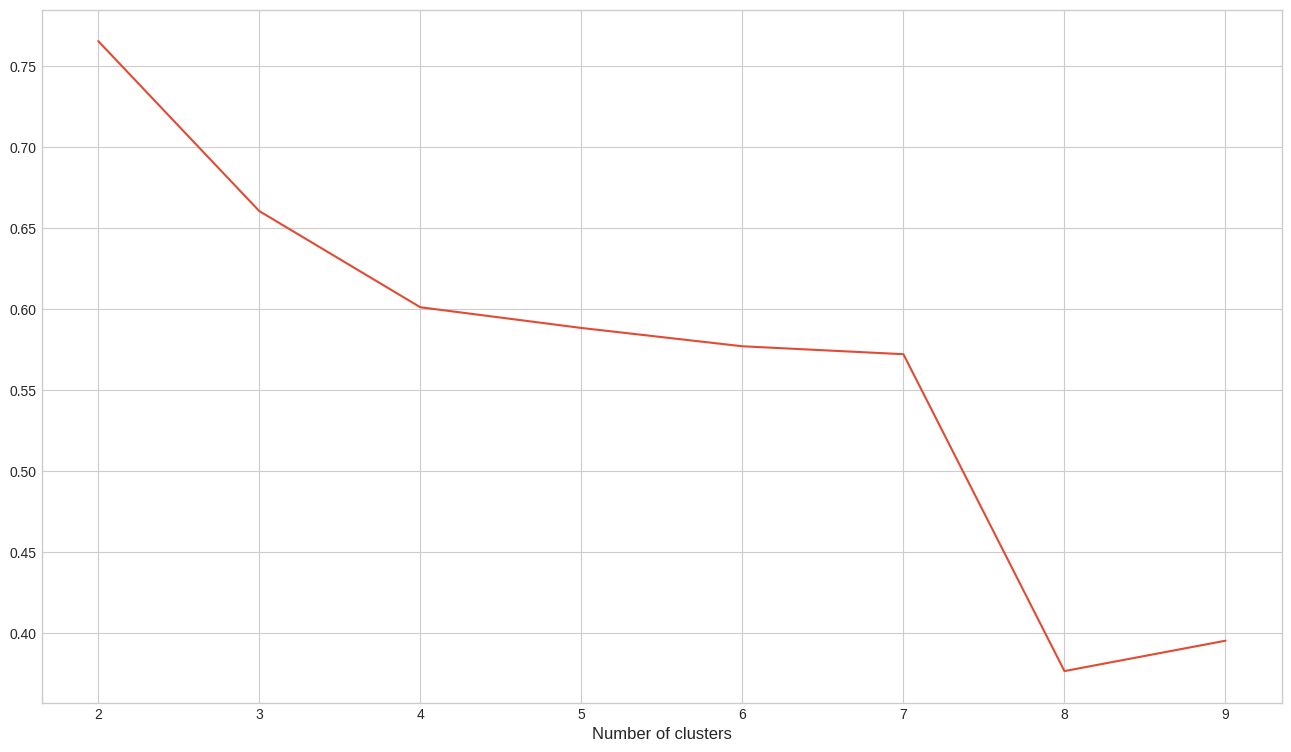

In [130]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

plt.plot([k for k in range(2, 10)],
         [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_) for k in range(2, 10)])
plt.xlabel('Number of clusters')
plt.show()

Penjelasan:


---

Kode di atas digunakan untuk membuat plot yang menunjukkan hubungan antara jumlah kluster dan nilai Silhouette Score. Dimulai dengan mencoba jumlah kluster dari 2 hingga 9, KMeans diterapkan pada data untuk setiap jumlah kluster, dan silhouette score dihitung untuk setiap hasil klustering. Hasilnya kemudian diplot untuk melihat jumlah kluster mana yang menghasilkan silhouette score tertinggi, yang menunjukkan kluster dengan pemisahan terbaik antar data.

---




#III. Menentukan Jumlah K dengan Elbow Method

#A. Import Library

In [133]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.cluster import KMeans

Penjelasan:


---

Kode di atas mengimpor pustaka untuk visualisasi dan klustering data. %matplotlib inline digunakan untuk menampilkan grafik langsung, pyplot digunakan untuk membuat grafik dengan style seaborn-v0_8-whitegrid. numpy untuk manipulasi array, dan KMeans untuk klustering.

---



#B. Menentukan Nilai yang Tepat untuk Cluster

In [134]:
SSE = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

Penjelasan:


---

Kode di atas digunakan untuk menghitung nilai Inertia (SSE) dengan berbagai jumlah kluster (K) pada dataset Iris. Untuk setiap nilai K antara 1 hingga 9, model KMeans dibuat dengan n_clusters=k, dilatih dengan data X, dan hasil Inertia (SSE) disimpan dalam list SSE. Inertia ini mengukur seberapa baik data terkelompok dalam kluster, dengan nilai yang lebih rendah menunjukkan pembagian kluster yang lebih baik.

---



#C. Plot Nilai K

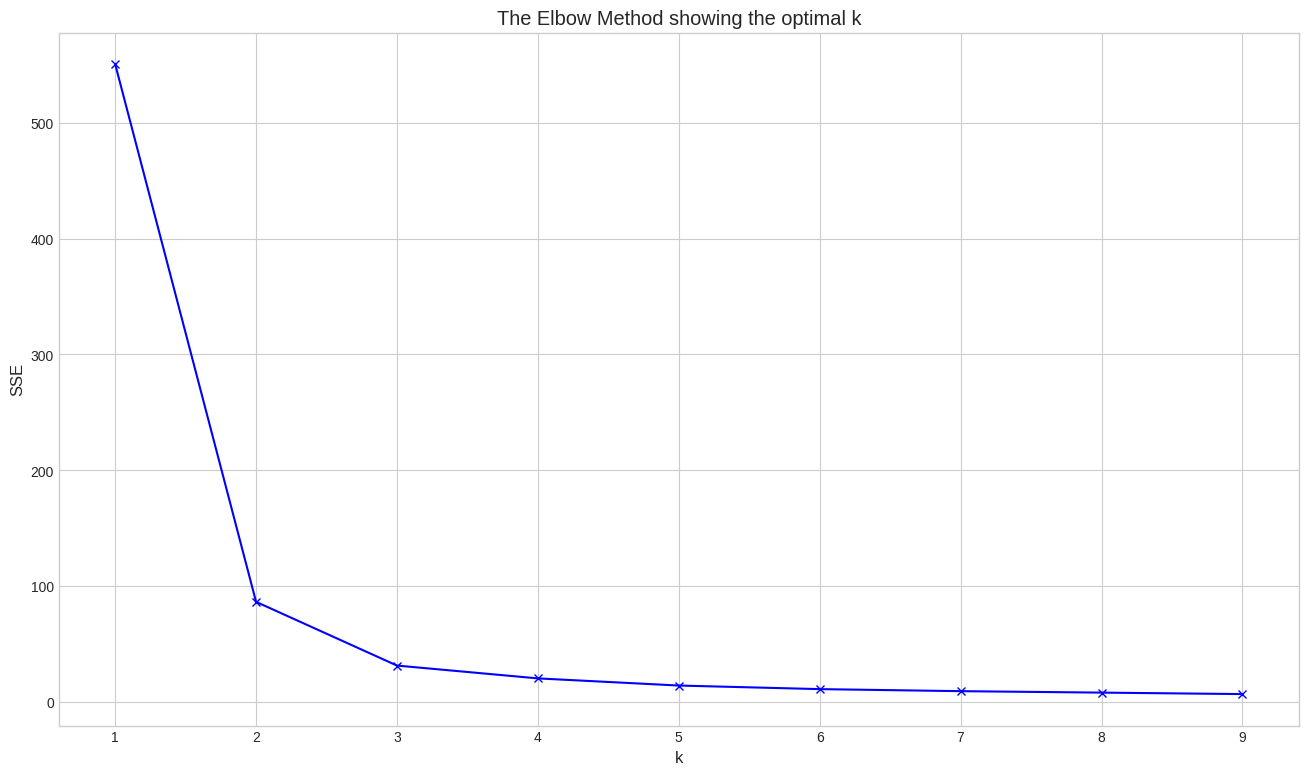

In [135]:
# Plot nilai K
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Penjelasan:


---

Di atas digunakan untuk menampilkan grafik yang menggambarkan hubungan antara jumlah kluster (K) dan nilai SSE (Inertia) dengan metode Elbow. Dengan plt.plot(), grafik dibuat untuk menunjukkan bagaimana SSE berubah seiring dengan jumlah kluster, dengan titik data yang ditandai menggunakan simbol 'x' berwarna biru. Grafik ini membantu mencari jumlah kluster yang optimal, yang biasanya terlihat pada titik elbow, di mana penurunan SSE mulai melambat.

---



#IV. Plot Hasil Cluster dengan Nilai K yang Dipilih dengan Scatterplot

#A. Menentukan Nilai K Berdasar Elbow Graph Tersebut

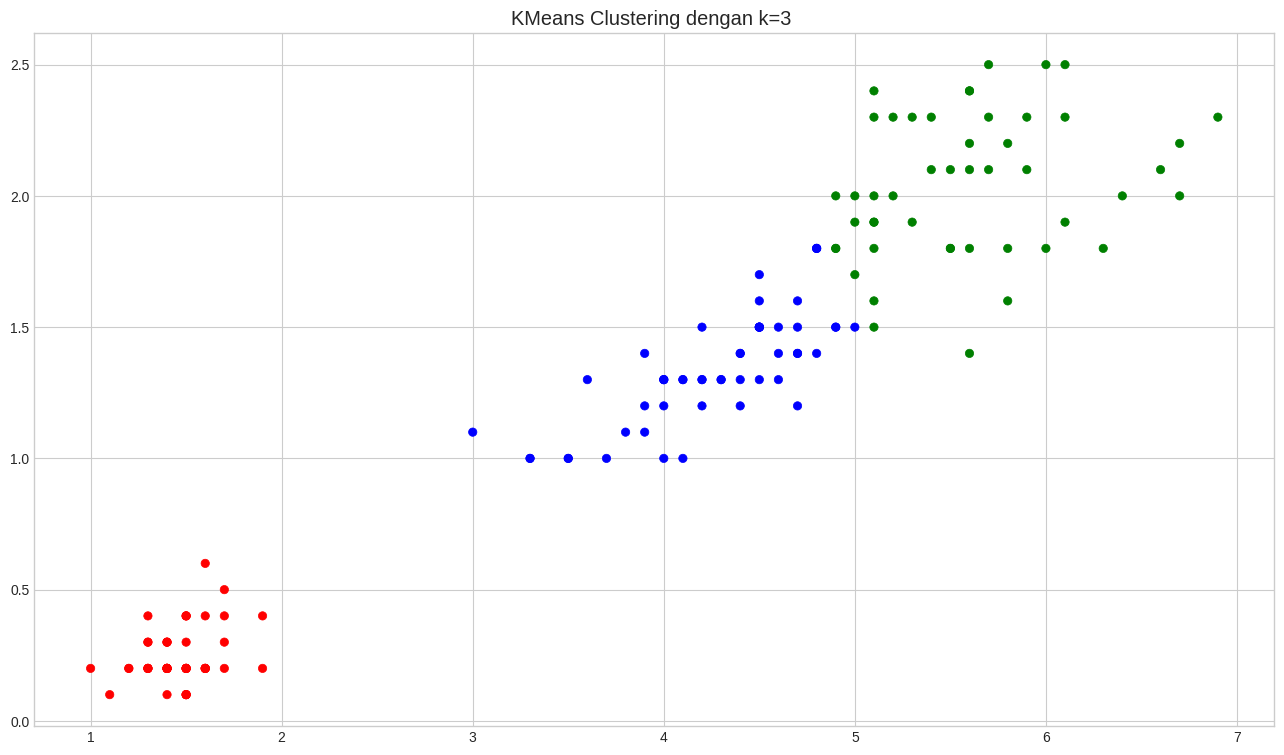

In [136]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b'
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=label_color)
plt.title("KMeans Clustering dengan k=3 ")
plt.show()

Penjelasan:


---

Kode di atas melakukan klustering KMeans pada data dengan jumlah kluster 3. Hasil klustering disimpan dalam y_pred, yang berisi label untuk setiap titik data. Kemudian, library LABEL_COLOR_MAP digunakan untuk memberikan warna berbeda untuk setiap kluster merah, hijau, dan biru. Warna yang sesuai dengan label kluster dimasukkan ke dalam label_color. Grafik sebar dibuat dengan plt.scatter(), menampilkan data dengan warna yang mewakili klusternya.

---



#B. Menampilkan Hasil Clustering KMeans dengan Jumlah Cluster yang Berbeda-beda (k=1 hingga k=6)

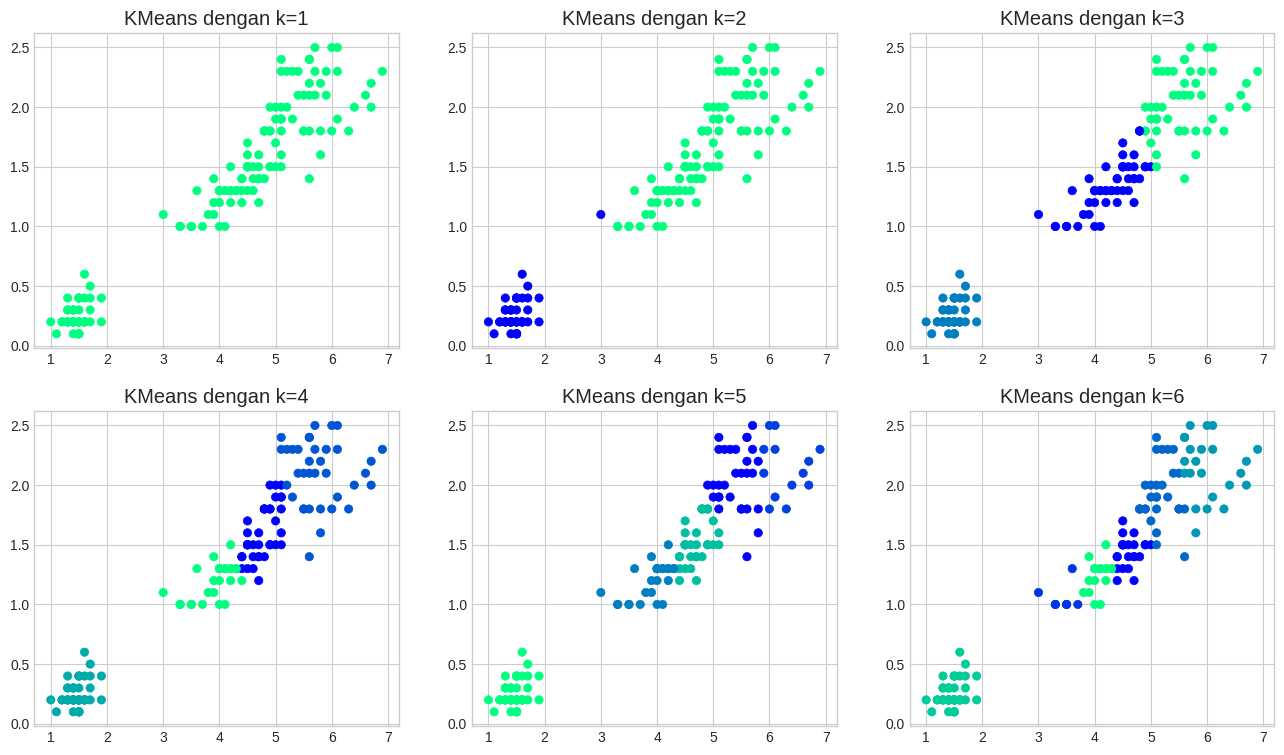

In [64]:
figure, ax = plt.subplots(2, 3)
K = range(1, 7)

for k in K:
    if k < 4:
        row = 0
        column = k - 1
    else:
        row = 1
        column = k - 4

    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(X)
    y_pred = kmeansModel.predict(X)
    ax[row][column].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='winter_r')
    ax[row][column].set_title(f'KMeans dengan k={k}')
plt.show()

Penjelasan:


---

Kode di atas membuat grid 2x3 untuk menampilkan hasil klustering KMeans dengan jumlah kluster yang bervariasi dari 1 hingga 6. Untuk setiap nilai K, model KMeans dilatih dan diprediksi untuk data X, lalu hasil klustering ditampilkan dalam setiap subplot menggunakan scatter() dengan warna berdasarkan kluster. Posisi subplot diatur sehingga kluster dengan K lebih kecil dari 4 ditampilkan di baris pertama, lalu yang lebih besar atau sama dengan 4 ditampilkan di baris kedua.

---

